This notebook contains my experiments with the Darts package.

In [2]:
!pip install darts

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
%matplotlib inline 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import os

from darts import TimeSeries

plt.rcParams["figure.figsize"] = (20, 10)

Dataset: https://www.notion.so/Exploratory-Data-Analysis-EDA-7ced94927f7f473bad7a651d24828285?pvs=4#b6be005c2b2640c0b89903023b28288b (CPCB dataset with AQI column)

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
!ls /content/drive/MyDrive/omdena-airquality/csv_aqi/

BandraKurlaComplexMumbaiIITM.csv
BandraMumbaiMPCB.csv
BorivaliEastMumbaiIITM.csv
BorivaliEastMumbaiMPCB.csv
ChakalaAndheriEastMumbaiIITM.csv
ChhatrapatiShivajiIntlAirportT2MumbaiMPCB.csv
ColabaMumbaiMPCB.csv
DeonarMumbaiIITM.csv
KandivaliEastMumbaiMPCB.csv
KhindipadaBhandupWestMumbaiIITM.csv
KurlaMumbaiMPCB.csv
MaladWestMumbaiIITM.csv
MazgaonMumbaiIITM.csv
MulundWestMumbaiMPCB.csv
NavyNagarColabaMumbaiIITM.csv
PowaiMumbaiMPCB.csv
SiddharthNagarWorliMumbaiIITM.csv
SionMumbaiMPCB.csv
VasaiWestMumbaiMPCB.csv
VileParleWestMumbaiMPCB.csv
WorliMumbaiMPCB.csv


In [6]:
directory = "/content/drive/MyDrive/omdena-airquality/csv_aqi/"
all_files = os.listdir(directory)
csv_files = [file for file in all_files if file.endswith(".csv")]
csv_files = sorted(csv_files)
print(csv_files)

['BandraKurlaComplexMumbaiIITM.csv', 'BandraMumbaiMPCB.csv', 'BorivaliEastMumbaiIITM.csv', 'BorivaliEastMumbaiMPCB.csv', 'ChakalaAndheriEastMumbaiIITM.csv', 'ChhatrapatiShivajiIntlAirportT2MumbaiMPCB.csv', 'ColabaMumbaiMPCB.csv', 'DeonarMumbaiIITM.csv', 'KandivaliEastMumbaiMPCB.csv', 'KhindipadaBhandupWestMumbaiIITM.csv', 'KurlaMumbaiMPCB.csv', 'MaladWestMumbaiIITM.csv', 'MazgaonMumbaiIITM.csv', 'MulundWestMumbaiMPCB.csv', 'NavyNagarColabaMumbaiIITM.csv', 'PowaiMumbaiMPCB.csv', 'SiddharthNagarWorliMumbaiIITM.csv', 'SionMumbaiMPCB.csv', 'VasaiWestMumbaiMPCB.csv', 'VileParleWestMumbaiMPCB.csv', 'WorliMumbaiMPCB.csv']


Load files and clean them.

In [7]:
df_list = []
station_names = []
for filename in csv_files: 
    print(f'Loading {filename}')
    df_temp = pd.read_csv(os.path.join(directory, filename), index_col=0)
    df_list.append(df_temp)
    name, _ = os.path.splitext(filename)
    station_names.append(name)

data_dict = dict(zip(station_names, df_list))

Loading BandraKurlaComplexMumbaiIITM.csv
Loading BandraMumbaiMPCB.csv
Loading BorivaliEastMumbaiIITM.csv


<ipython-input-7-537651ad3edb>:5: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  df_temp = pd.read_csv(os.path.join(directory, filename), index_col=0)


Loading BorivaliEastMumbaiMPCB.csv
Loading ChakalaAndheriEastMumbaiIITM.csv
Loading ChhatrapatiShivajiIntlAirportT2MumbaiMPCB.csv
Loading ColabaMumbaiMPCB.csv
Loading DeonarMumbaiIITM.csv
Loading KandivaliEastMumbaiMPCB.csv
Loading KhindipadaBhandupWestMumbaiIITM.csv
Loading KurlaMumbaiMPCB.csv
Loading MaladWestMumbaiIITM.csv
Loading MazgaonMumbaiIITM.csv
Loading MulundWestMumbaiMPCB.csv
Loading NavyNagarColabaMumbaiIITM.csv
Loading PowaiMumbaiMPCB.csv
Loading SiddharthNagarWorliMumbaiIITM.csv
Loading SionMumbaiMPCB.csv
Loading VasaiWestMumbaiMPCB.csv
Loading VileParleWestMumbaiMPCB.csv
Loading WorliMumbaiMPCB.csv


In [8]:
def clean_data(data):
    data["Date"] = pd.to_datetime(data.Date, format='%Y-%m-%d %H:%M:%S') # Format Date column as datetime
    return data 

In [9]:
for key in data_dict.keys():
    data_dict[key] = clean_data(data_dict[key])

### Use a single station as example

In [10]:
df = data_dict['KhindipadaBhandupWestMumbaiIITM'][['Date', 'AQI_calculated']]
df_hourly = df.set_index('Date').resample('H').mean().reset_index()

Convert the dataframe as `darts.Timeseries` object.

Text(0.5, 1.0, 'Hourly AQI')

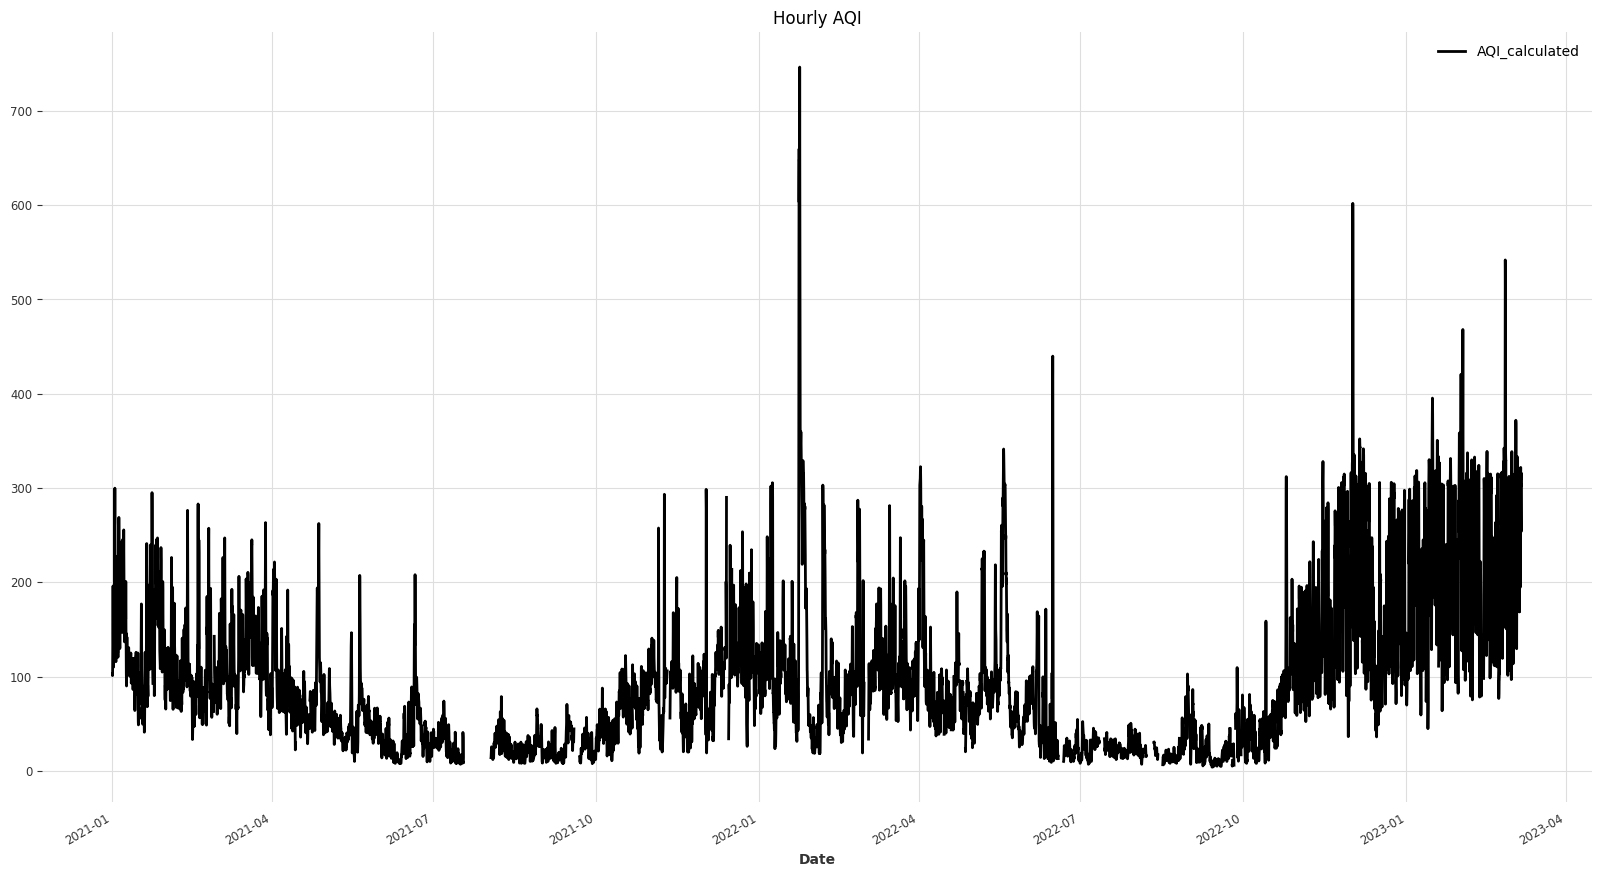

In [11]:
ts = TimeSeries.from_dataframe(df=df_hourly, time_col='Date', value_cols= ['AQI_calculated'], fill_missing_dates=True, freq='H')
ts.plot()
plt.title("Hourly AQI")

Fill in missing values with default method: linear interpolation. 

Text(0.5, 1.0, 'Hourly AQI with imputed values')

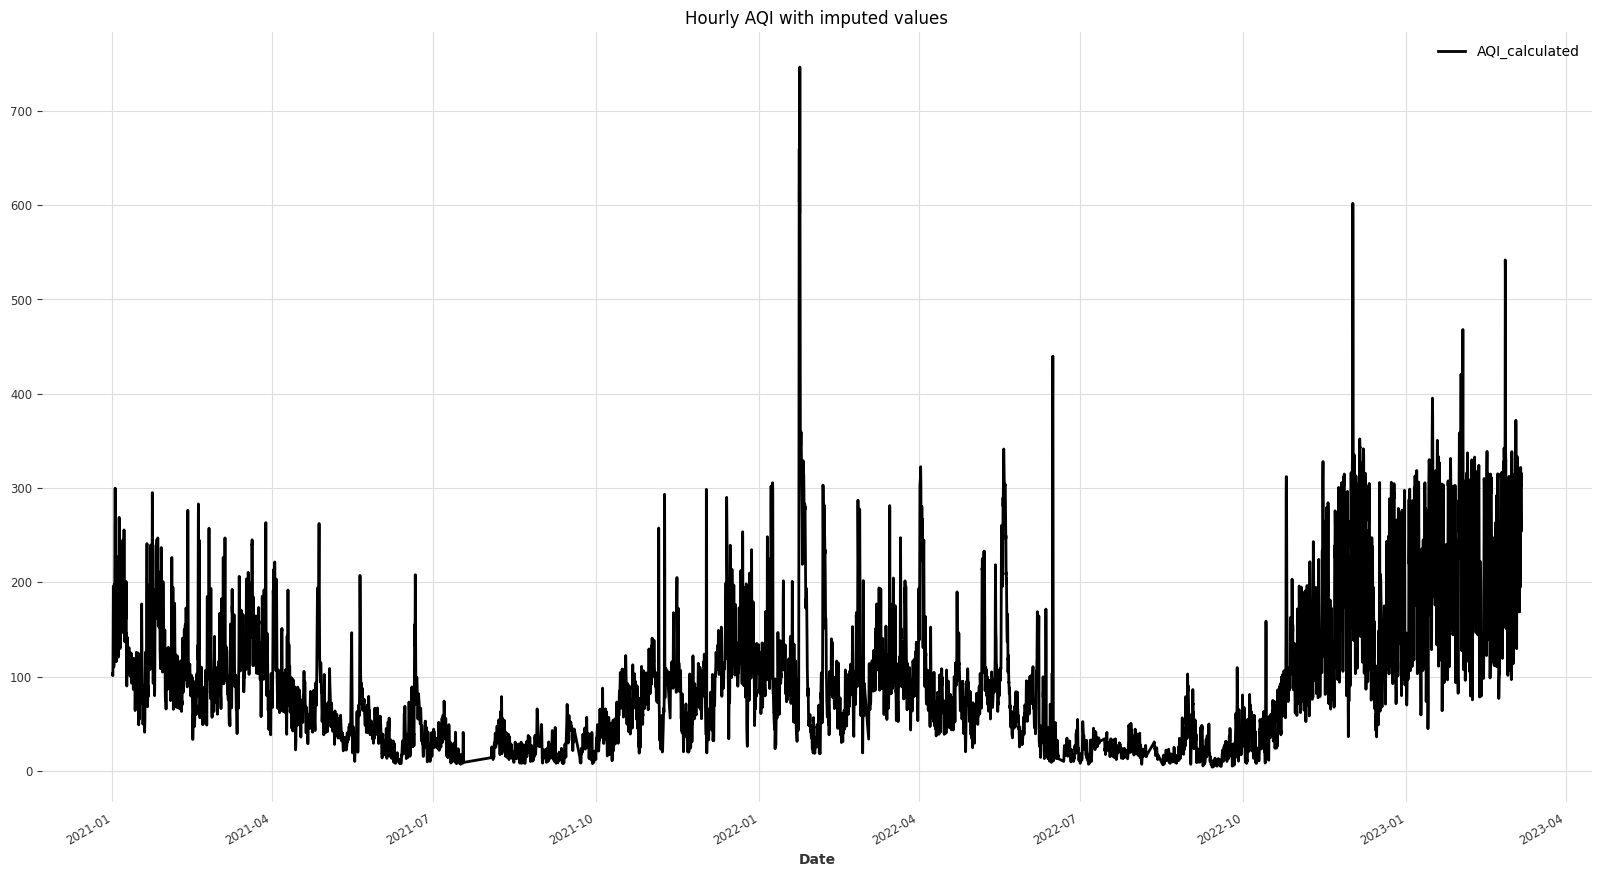

In [12]:
from darts.utils.missing_values import fill_missing_values
ts = fill_missing_values(ts)
ts.plot()
plt.title("Hourly AQI with imputed values")

Use data after `1-Oct-2022` as validation set and everything before as training set.

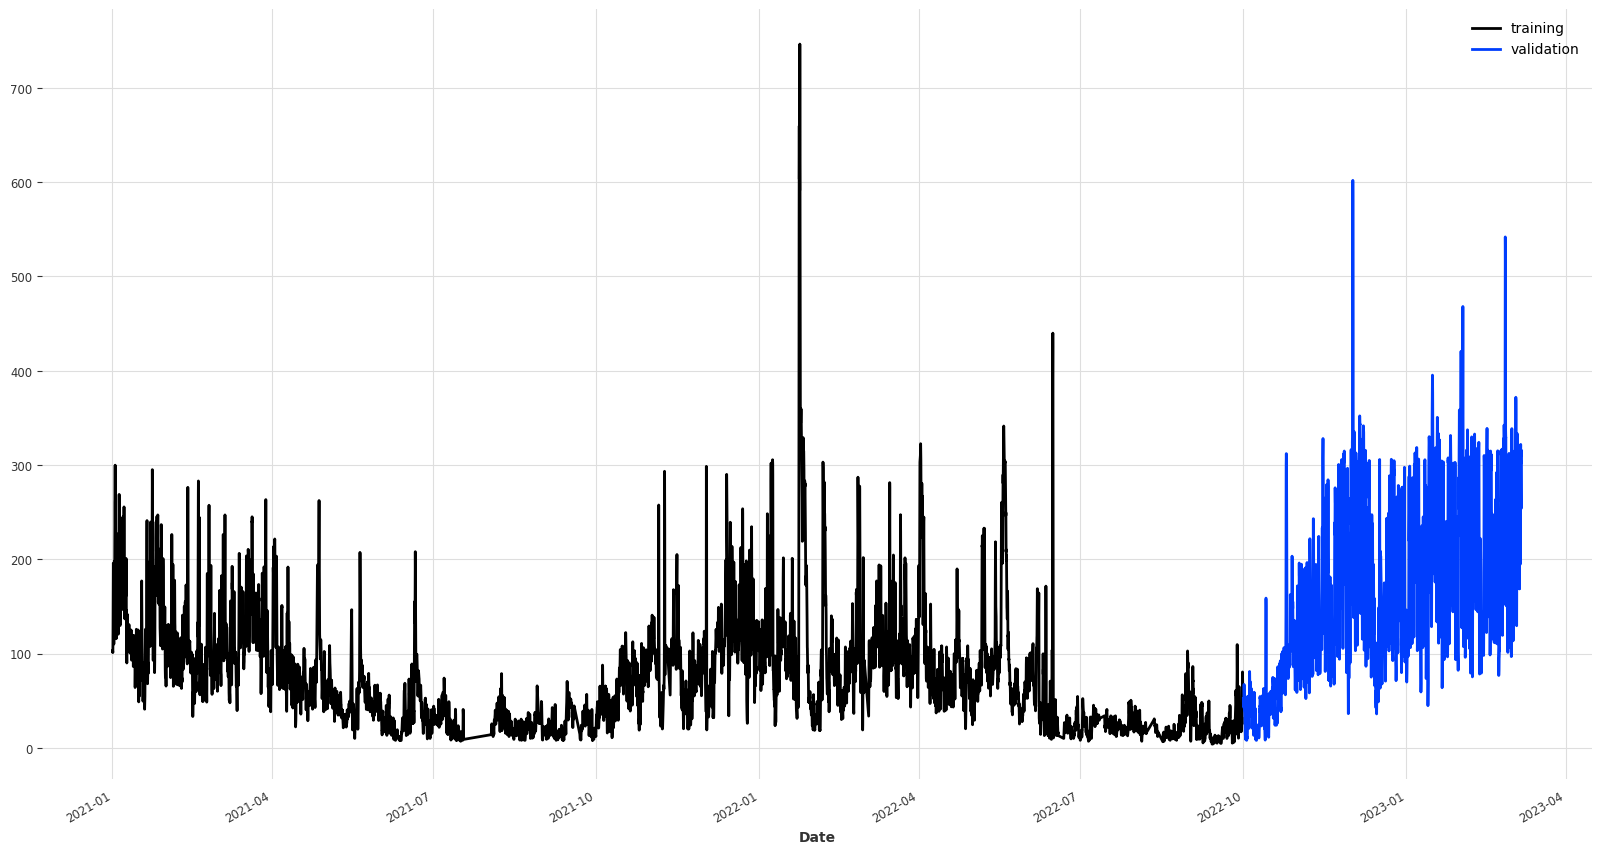

In [13]:
train, val = ts.split_after(pd.Timestamp("20221001"))
train.plot(label="training")
val.plot(label="validation")

The `NaiveSeasonal` method is used as a baseline. When `K=1` the last value is repeated as a prediction.

Text(0.5, 1.0, 'Hourly AQI predicted with Naive Seasonal (K=1)')

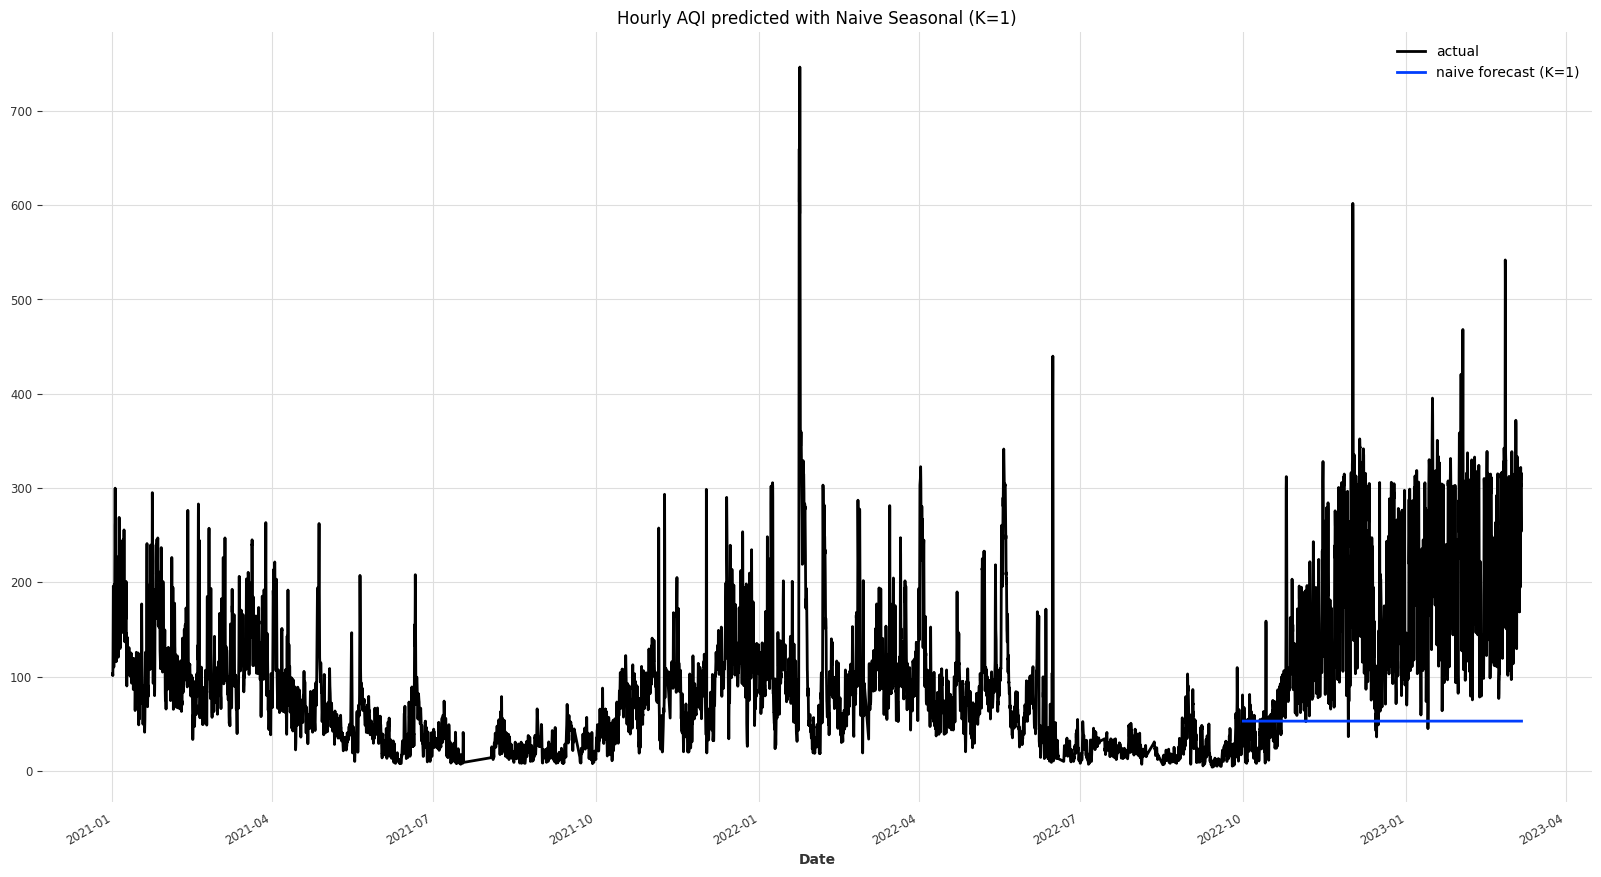

In [14]:
from darts.models import NaiveSeasonal

naive_model = NaiveSeasonal(K=1)
naive_model.fit(train)
naive_forecast = naive_model.predict(len(val))

ts.plot(label="actual")
naive_forecast.plot(label="naive forecast (K=1)")
plt.title("Hourly AQI predicted with Naive Seasonal (K=1)")

Use [MAPE](https://unit8co.github.io/darts/generated_api/darts.metrics.metrics.html) (Mean Absolute Percentage Error) on the validation set as our evaluation metric.

In [15]:
from darts.metrics import mape

print(
    "Mean absolute percentage error for the naive forecast (K=1): {:.2f}%.".format(
        mape(val, naive_forecast)
    )
)

Mean absolute percentage error for the naive forecast (K=1): 70.01%.


Instead of last hour being repeated, we can repeat the last 24-hour data using `K=24`.

Text(0.5, 1.0, 'Hourly AQI predicted with Naive Seasonal (K=24)')

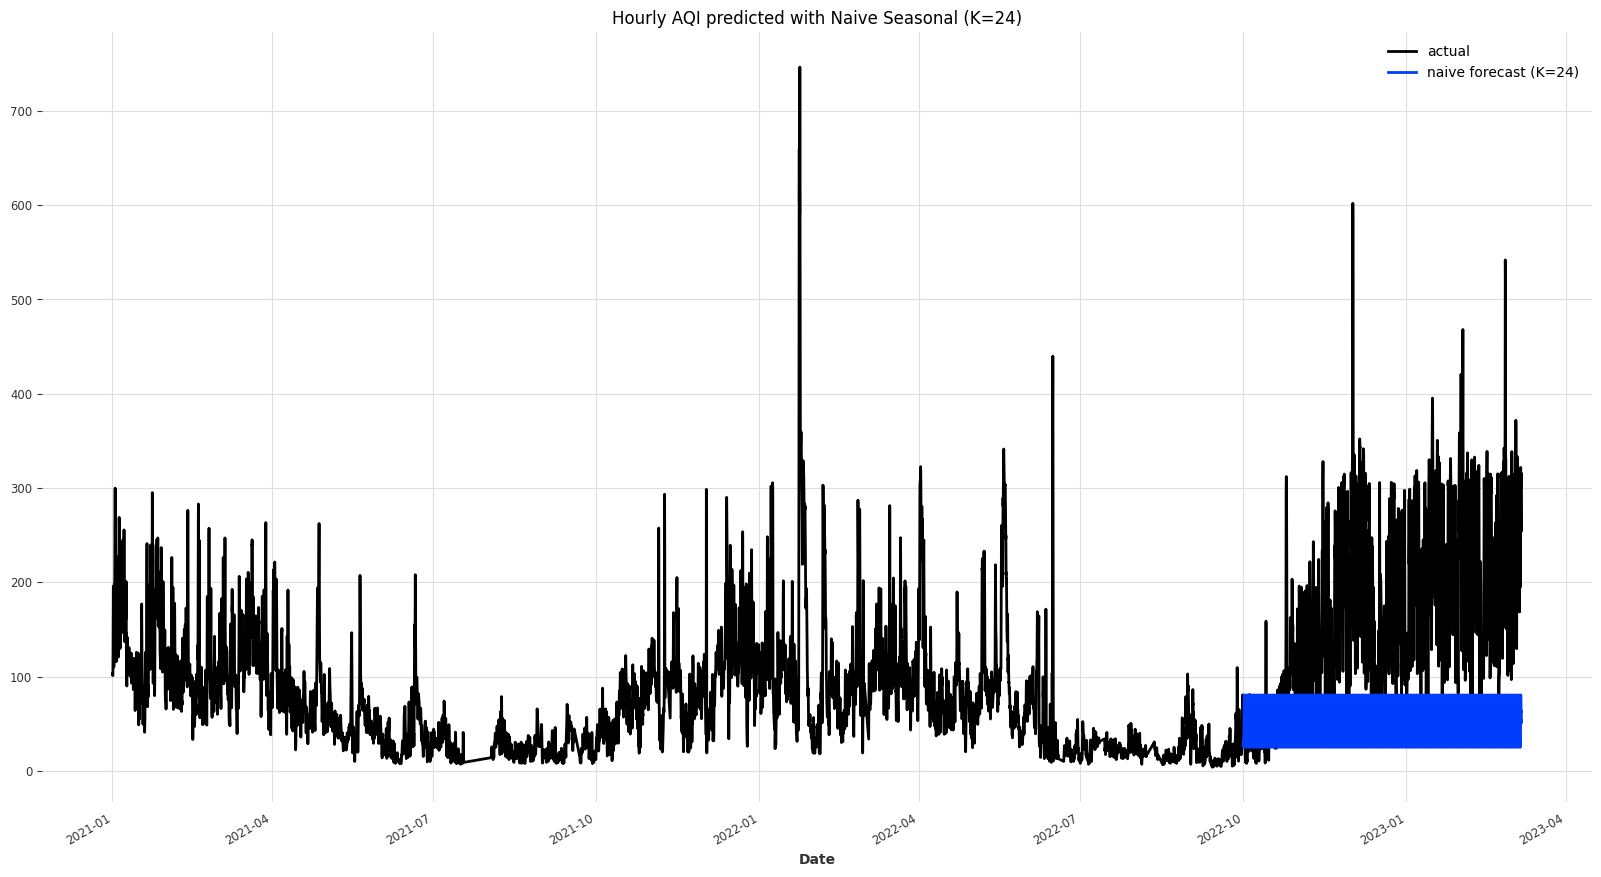

In [16]:
naive_model = NaiveSeasonal(K=24)
naive_model.fit(train)
naive_forecast = naive_model.predict(len(val))

ts.plot(label="actual")
naive_forecast.plot(label="naive forecast (K=24)")
plt.title("Hourly AQI predicted with Naive Seasonal (K=24)")

In [17]:
print(
    "Mean absolute percentage error for the naive forecast (K=24): {:.2f}%.".format(
        mape(val, naive_forecast)
    )
)

Mean absolute percentage error for the naive forecast (K=24): 71.54%.


Below, we can see how this forecase is indeed very naive for the AQI!

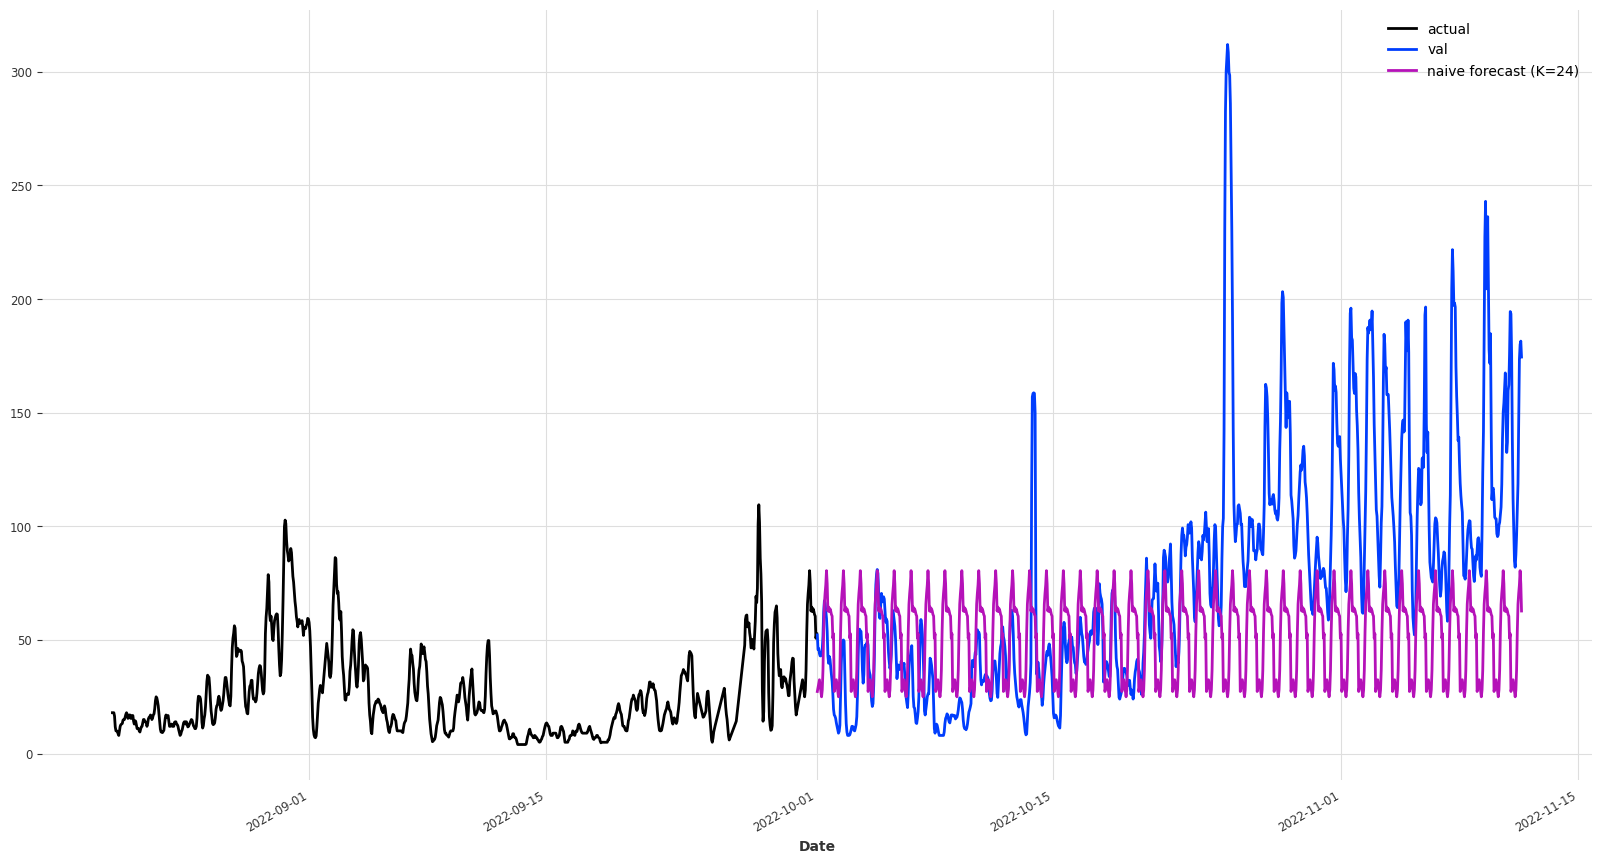

In [18]:
train[-1000:].plot(label="actual")
val[0:1000].plot(label="val")
naive_forecast[0:1000].plot(label="naive forecast (K=24)")

We can look at the ACF plot to check seasonality.

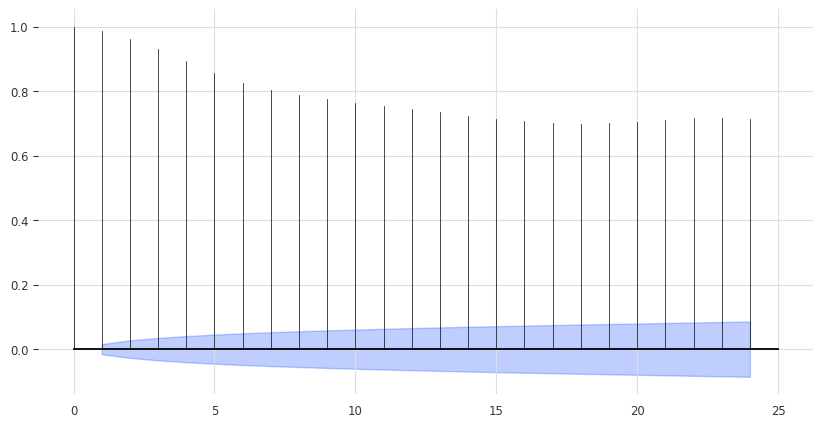

In [19]:
from darts.utils.statistics import plot_acf, check_seasonality

plot_acf(train, alpha=0.05)


In [20]:
for m in range(2, 25):
    is_seasonal, period = check_seasonality(train, m=m, alpha=0.05)
    if is_seasonal:
        print("There is seasonality of order {}.".format(period))

There is seasonality of order 23.


# Lag 1 Autoregressive Model 

In [21]:
from darts.models import RegressionModel



# Prophet 

Try the Prophet package outside Darts (could not get Darts Prophet to work!)

In [22]:
!pip install prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [23]:
from prophet import Prophet

In [24]:
#rename column
df_prophet = df_hourly.rename(columns={'Date': 'ds', 'AQI_calculated' : 'y'})

Prophet needs data as dataframes. 

In [25]:
train_prophet = df_prophet[0:len(train)-1]
val_prophet = df_prophet[len(train):len(df_prophet)-1]

In [26]:
train_prophet.columns

Index(['ds', 'y'], dtype='object')

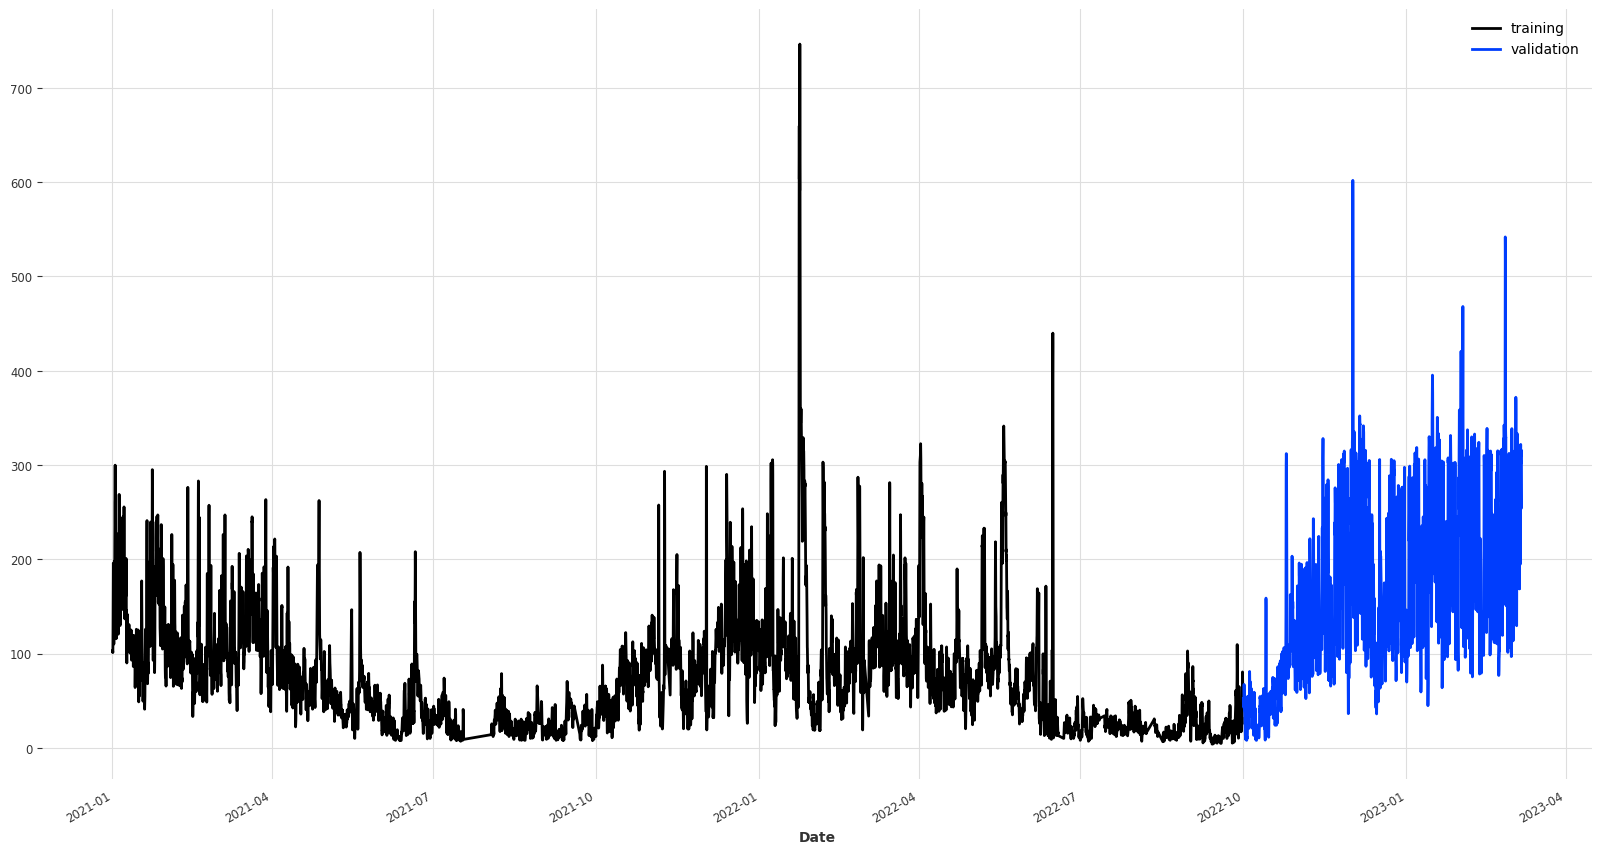

In [27]:
train.plot(label="training")
val.plot(label="validation")

In [28]:
model = Prophet()
model.fit(train_prophet)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpz87ofcvq/9mlkgdfx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpz87ofcvq/hmu5xp4h.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=26914', 'data', 'file=/tmp/tmpz87ofcvq/9mlkgdfx.json', 'init=/tmp/tmpz87ofcvq/hmu5xp4h.json', 'output', 'file=/tmp/tmpz87ofcvq/prophet_modelwozl32b4/prophet_model-20230330193524.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:35:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:35:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Set the future forecast to 2 months `=24*60`.  

In [29]:
future = model.make_future_dataframe(periods=24*60, freq='H', include_history=False)
future.tail()

,ds
1435,2022-11-29 19:00:00
1436,2022-11-29 20:00:00
1437,2022-11-29 21:00:00
1438,2022-11-29 22:00:00
1439,2022-11-29 23:00:00


In [30]:
future.head()

,ds
0,2022-10-01 00:00:00
1,2022-10-01 01:00:00
2,2022-10-01 02:00:00
3,2022-10-01 03:00:00
4,2022-10-01 04:00:00


In [31]:
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
1435,2022-11-29 19:00:00,-33.373094,-102.104481,36.953143
1436,2022-11-29 20:00:00,-34.210074,-97.427207,30.302569
1437,2022-11-29 21:00:00,-34.094154,-100.492604,35.723231
1438,2022-11-29 22:00:00,-33.492233,-100.728987,34.163365
1439,2022-11-29 23:00:00,-32.758141,-97.367033,33.355202


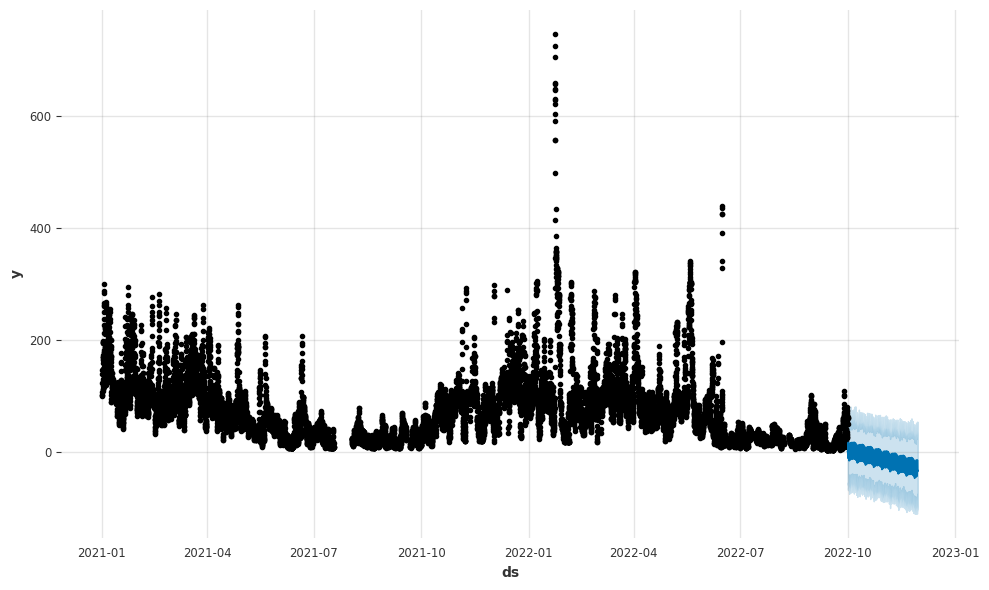

In [32]:
plt.rcParams['figure.figsize']=(20,10)
fig1 = model.plot(forecast)


It appears that Prophet is not working well because we are looking at a long forecast horizon of 2 months! 

The diagnostics needs to be improved - see link: https://facebook.github.io/prophet/docs/diagnostics.html#cross-validation - how do we evaluate next-day predictions for `val_prophet`? #TODO

# NBEATS Model 
Ref: [Darts NBEATS example](https://unit8co.github.io/darts/examples/07-NBEATS-examples.html). 

It was the first purely deep learning model used with time series. See [paper](https://arxiv.org/pdf/1905.10437.pdf).

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from darts import TimeSeries
from darts.models import NBEATSModel
from darts.dataprocessing.transformers import Scaler, MissingValuesFiller
from darts.metrics import mape, r2_score
from darts.datasets import EnergyDataset

In [34]:
def display_forecast(pred_series, ts_transformed, forecast_type, start_date=None):
    plt.figure(figsize=(8, 5))
    if start_date:
        ts_transformed = ts_transformed.drop_before(start_date)
    ts_transformed.univariate_component(0).plot(label="actual")
    pred_series.plot(label=("historic " + forecast_type + " forecasts"))
    plt.title(
        #"R2: {}".format(r2_score(ts_transformed.univariate_component(0), pred_series))
        "MAPE: {}".format(mape(ts_transformed.univariate_component(0), pred_series))
    )
    plt.legend()

## KhindipadaBhandupWestMumbaiIITM

Text(0.5, 1.0, 'Hourly AQI')

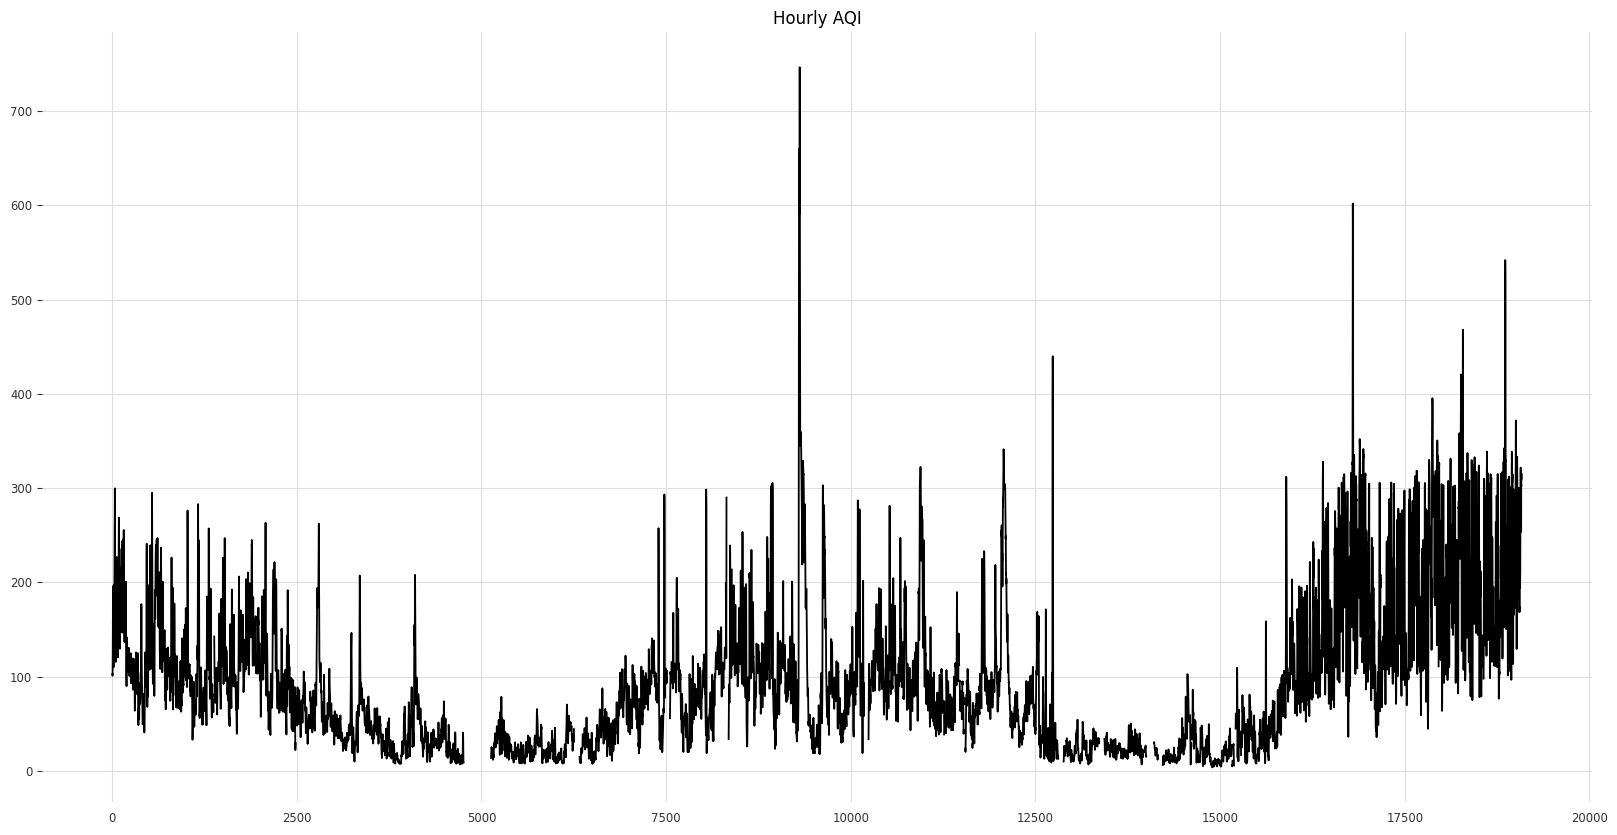

In [35]:
df_hourly['AQI_calculated'].plot()
plt.title("Hourly AQI")

In [36]:
df.columns

Index(['Date', 'AQI_calculated'], dtype='object')

Text(0.5, 1.0, 'Hourly AQI calculated')

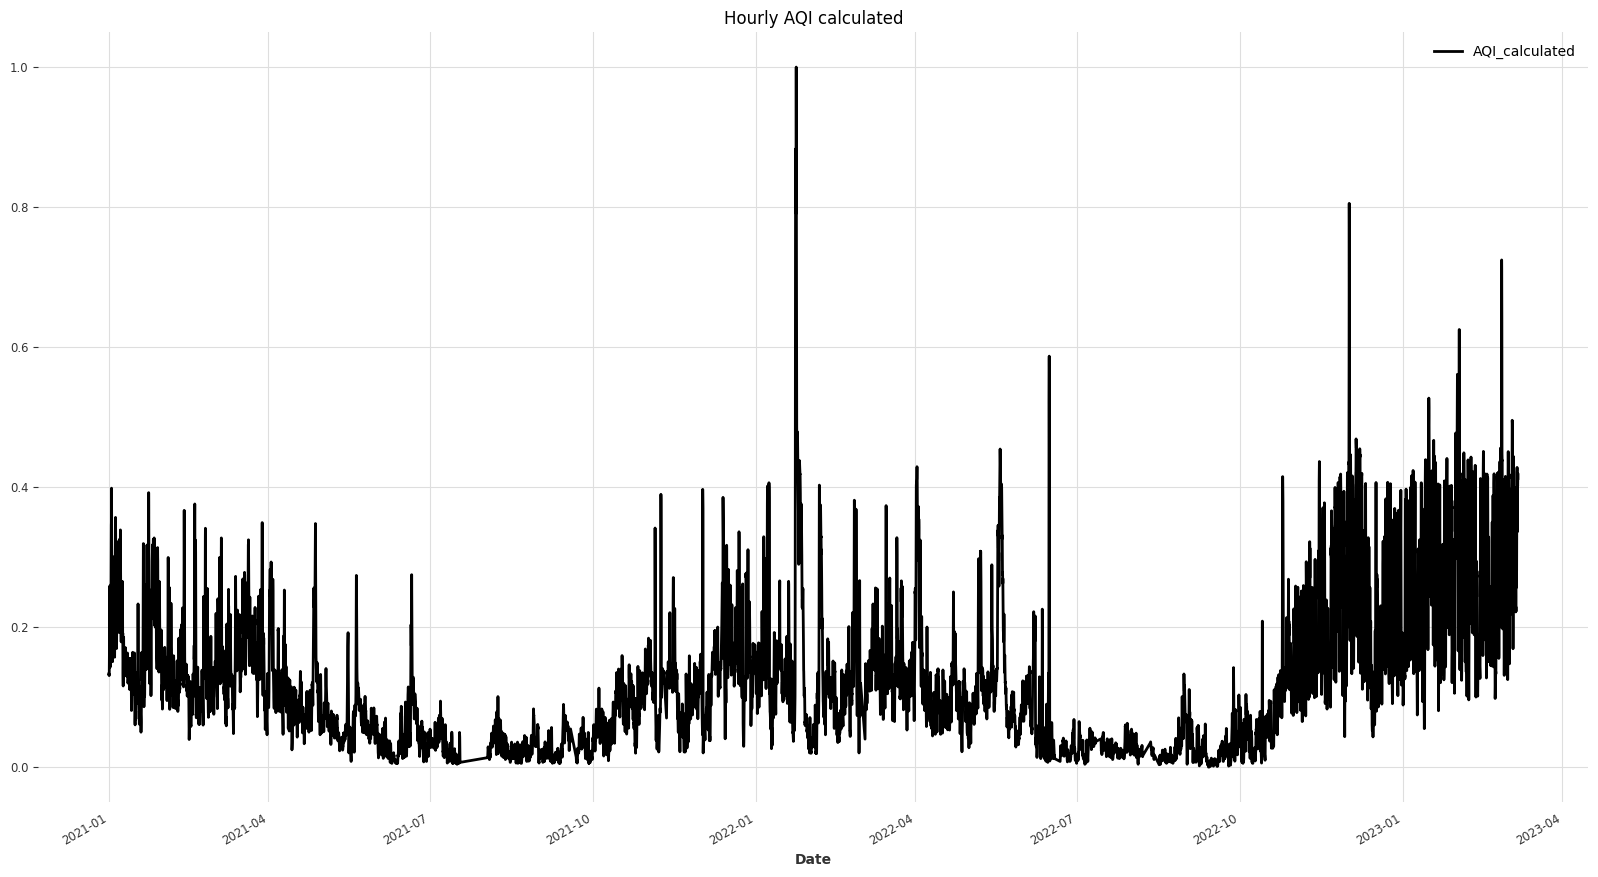

In [37]:
filler = MissingValuesFiller()
scaler = Scaler()
series = scaler.fit_transform(
    filler.transform(
        TimeSeries.from_dataframe(
            df_hourly, "Date", ["AQI_calculated"]
        )
    )
).astype(np.float32)
series.plot()
plt.title("Hourly AQI calculated")

We have normalised the AQI data - note the Y-axis.

Set the same cutoff date as before `1-Oct-2022` to split train and validation data.

In [38]:
train, val = series.split_after(pd.Timestamp("20221001"))

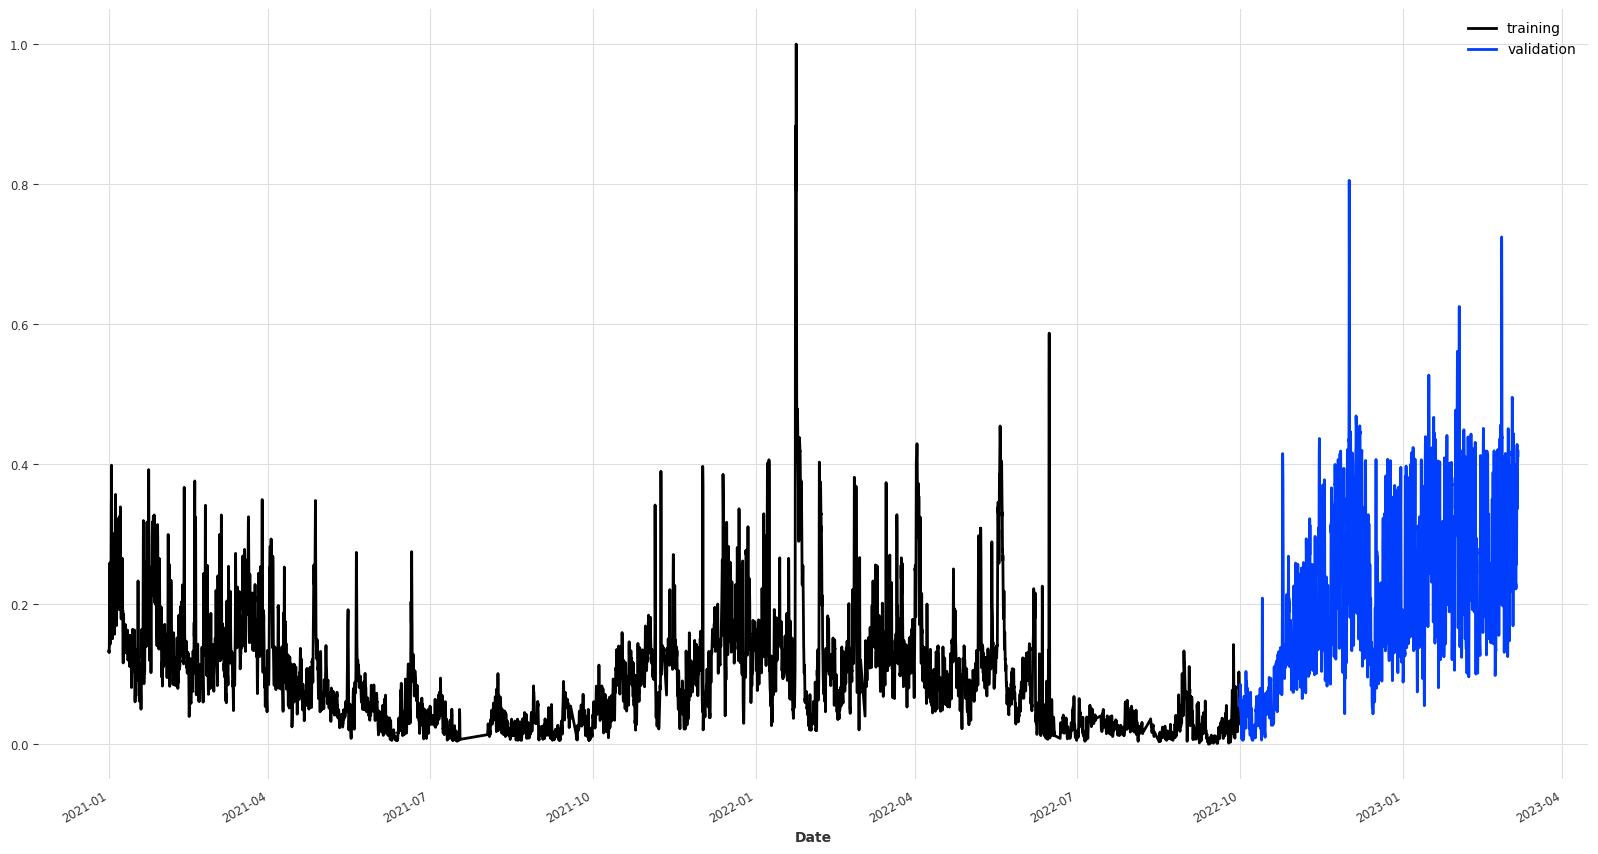

In [39]:
train.plot(label="training")
val.plot(label="validation")

In [40]:
model_nbeats = NBEATSModel(
    input_chunk_length=30,
    output_chunk_length=7,
    generic_architecture=True,
    num_stacks=10,
    num_blocks=1,
    num_layers=4,
    layer_widths=512,
    n_epochs=100,
    nr_epochs_val_period=1,
    batch_size=800,
    model_name="nbeats_run",
)

(Option) Skip the training below and load the already trained model from [Notion](https://www.notion.so/task-3-modeling-_-Some-ideas-9cb45373d2734dd6a90628bd18c50f4c?pvs=4#91dbe72a8f784d88a2fc81054b4cb8ba). 

#### Training time: 
1. GPU Runtime: 3m
2. CPU Runtime: 37m 

Note: Earlier I was using daily data and the model was overfitting. But with hourly data, it seems to be good. Need to confirm by monitoring the train/validation error on tensorboard. #TODO

In [41]:
model_nbeats.fit(train, val_series=val, verbose=True)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | stacks        | ModuleList       | 8.1 M 
---------------------------------------------------
8.1 M     Trainable params
2.7 K     Non-trainable params
8.1 M     Total params
32.368    Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

/usr/local/lib/python3.9/dist-packages/pytorch_lightning/trainer/call.py:54: UserWarning: Detected KeyboardInterrupt, attempting graceful shutdown...
  rank_zero_warn("Detected KeyboardInterrupt, attempting graceful shutdown...")


In [42]:
from datetime import datetime

timestamp_str = datetime.now().strftime('%Y-%m-%d_%H-%M-%S')
timestamp_str = timestamp_str.replace(" ", "") # Remove all spaces
print(timestamp_str)

2023-03-30_19-36-19


Load model 

In [43]:
model_path = '/content/drive/MyDrive/omdena-airquality/models/NBEATSModel_nr_' + timestamp_str
model_nbeats.save(model_path)
print(f'Saved model as: {model_path}')

Saved model as: /content/drive/MyDrive/omdena-airquality/models/NBEATSModel_nr_2023-03-30_19-36-19


In [44]:
model_nbeats_loaded = NBEATSModel.load(model_path)

In [ ]:
pred_series = model_nbeats_loaded.historical_forecasts(
    series,
    start=pd.Timestamp("20221001"),
    forecast_horizon=1,
    stride=5,
    retrain=False,
    verbose=True,
)


Notes
*   Prediction using the `historical_forecasts` function takes around 6 mins on GPU. WHY!?
*   Removed the verbose output from the notebook
* Assuming `forecast_horizon=1` is prediction of next hour. 


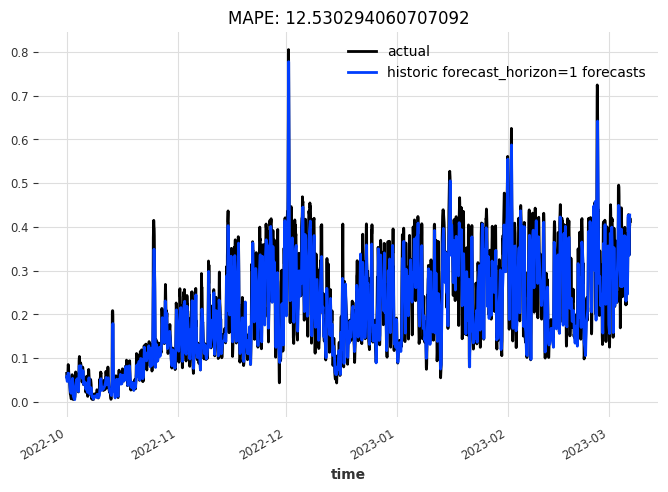

In [48]:
display_forecast(pred_series, series, "forecast_horizon=1", start_date=pd.Timestamp("20221001"))

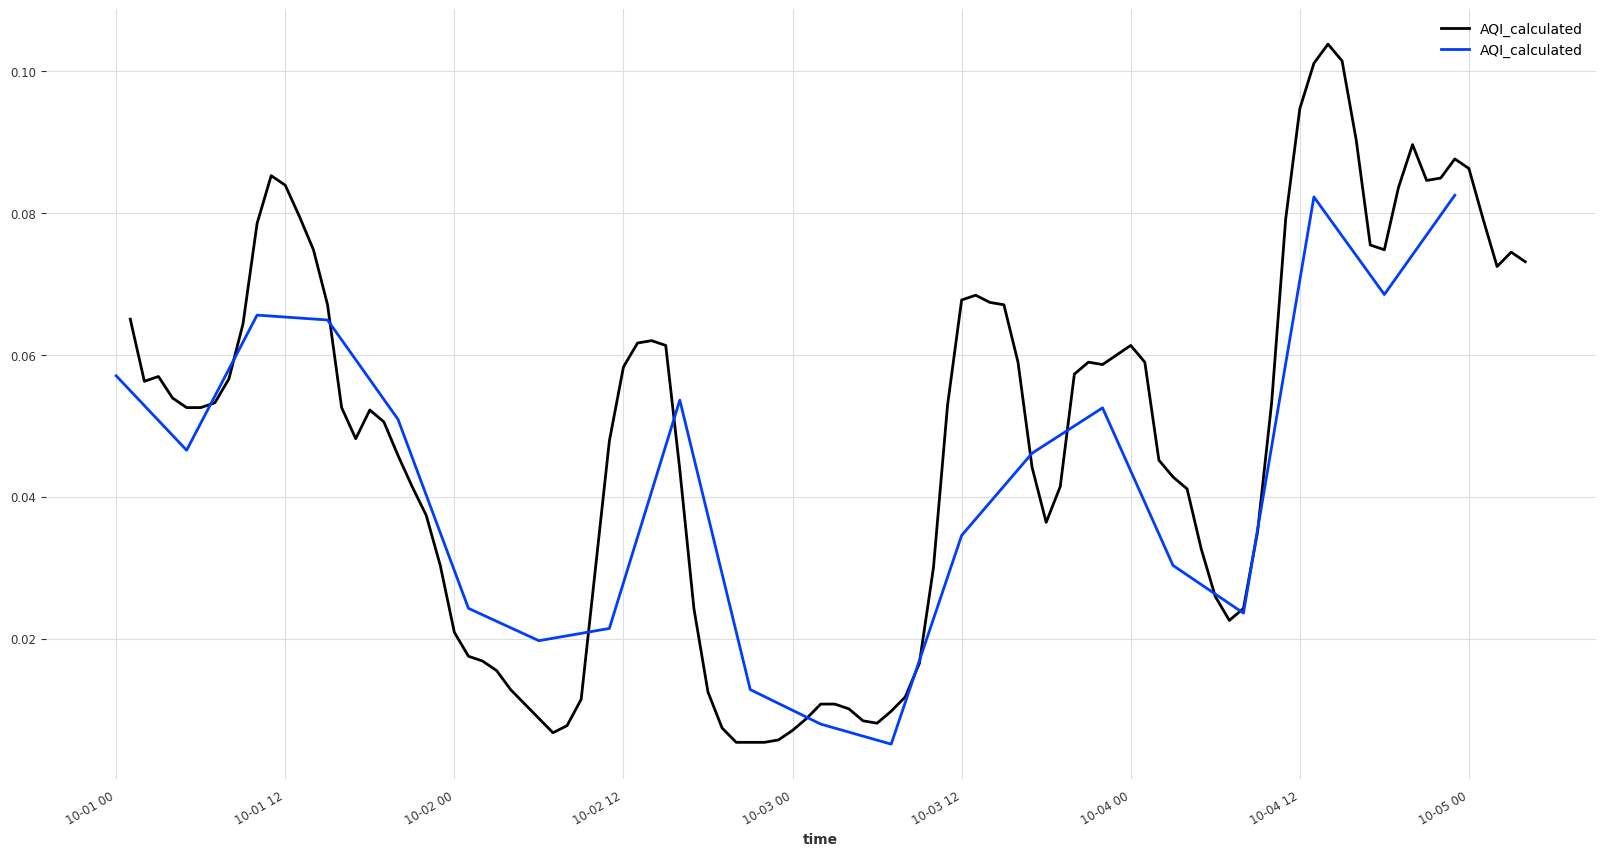

In [65]:
val[0:100].plot()
pred_series[0:20].plot()

Because strid=5 forecast is made for every 5 values in the `val` data. 

MAPE falls to 12%. But is the MAPE calculated similar to earlier cases? Check the documentation! https://unit8co.github.io/darts/generated_api/darts.models.forecasting.nbeats.html#darts.models.forecasting.nbeats.NBEATSModel.historical_forecasts #TODO


Confirm `forecast_horizon=1` means next hour... or is it next day? #TODO.